# Lecture 4 - Exploratory data analysis, training models

## The plan

- Business context of data
- Feature exploration
  - Categoricals
	- Support
  - Scaling
- (Outliers, missing data)
- Correlations
- Fitting a model in scikit-learn
- Evalutating a model

<img src="img/presentation.jpeg" style="width:40vw">

# The Business Context of Data

- Always need subject matter expertise, not obvious from data alone
  - Subject matter experts (SMEs) usually part of a project team
- In the lectures, we need to 'invent' the business context

### It is essential to get this right.
### If not, you will solve the wrong problem!


In [1]:
import pandas as pd

# Reading the data

In [6]:
df = pd.read_csv('data/income_data.csv',
  dtype={'workclass': 'category'})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       32561 non-null  category
 2   fnlwgt          32561 non-null  int64   
 3   education       32561 non-null  object  
 4   education-num   32561 non-null  int64   
 5   marital-status  32561 non-null  object  
 6   occupation      32561 non-null  object  
 7   relationship    32561 non-null  object  
 8   race            32561 non-null  object  
 9   sex             32561 non-null  object  
 10  capital-gain    32561 non-null  int64   
 11  capital-loss    32561 non-null  int64   
 12  hours-per-week  32561 non-null  int64   
 13  native-country  32561 non-null  object  
 14  income          32561 non-null  object  
 15  target          32561 non-null  int64   
dtypes: category(1), int64(7), object(8)
memory usage: 3.8+ MB


In [8]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [9]:
df['workclass'].describe()

count        32561
unique           9
top        Private
freq         22696
Name: workclass, dtype: object

# Buisness Cases

- Customized adertising
  - Marketing the right product to the right audience
    - Positives, and negatives. Aggressive marketing vs. wasteing people's time?
- Evaluating credit risk
- Quantifying career advise
  - Biases?

# Problems With a Data Set Like This

- Introducing biases
  - E.g. racial and gender biases
- Neglecting privacy
- GDPR?

## Try asking Chat GPT

Reflect on which problems you see with a dataset like this. Now ask ChatGPT which problems it sees. Are there any you would not have thought of?

    A dataset is collected containing demorgraphic information, such as age, gender, race, as well as education, occupation, hors worked per week, and income data. What potential business cases could be served with such a dataset? What problems do you see, ethical and practical?

## DISCLAIMER

In a real-world application, samples should be weighted by the fnlwgt column. We will ignore this here at our own peril.

## General shape of the data, correlations etc.

<Axes: ylabel='Frequency'>

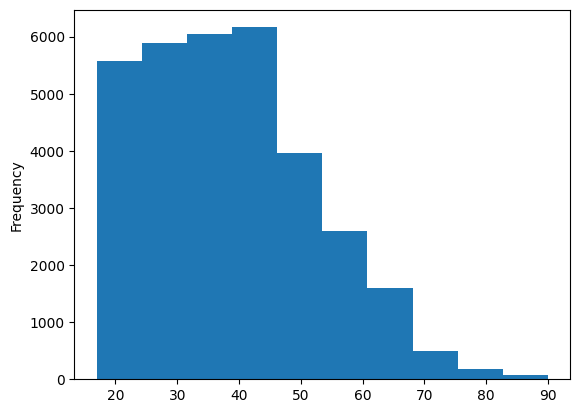

In [10]:
df['age'].plot.hist()

<Axes: xlabel='age', ylabel='education-num'>

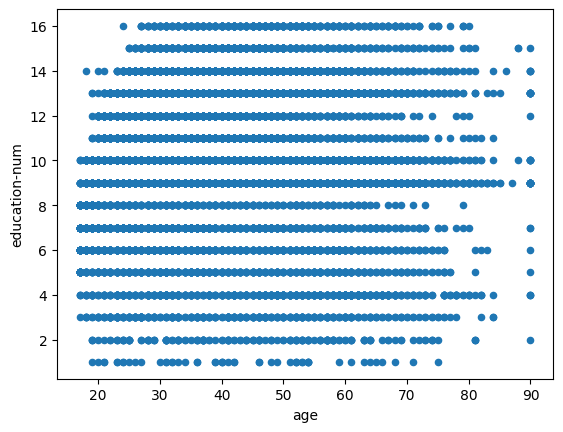

In [11]:
df.plot.scatter('age', 'education-num')

<Axes: xlabel='age', ylabel='education-num'>

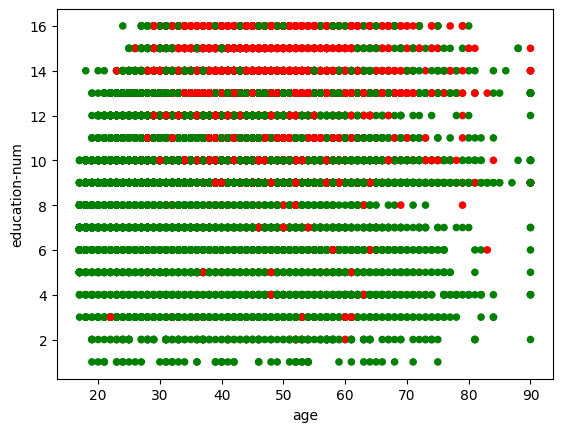

In [12]:
df.plot.scatter('age', 'education-num',
                c=['r' if t == 1 else 'g' for t in df['target']])

<Axes: xlabel='education'>

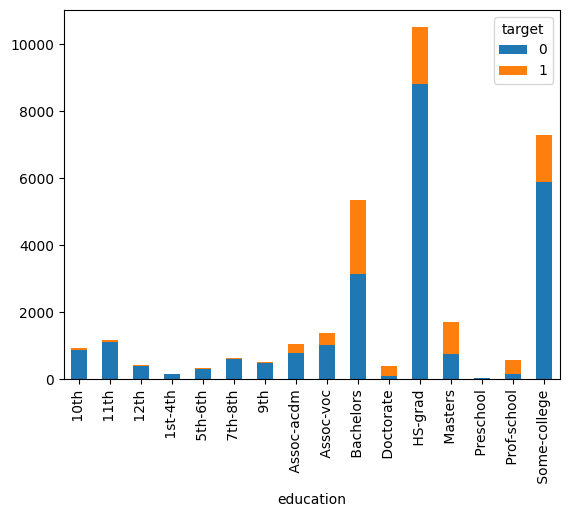

In [21]:
df.groupby(['education', 'target'])\
    .size().unstack().fillna(0).astype('int')\
        .plot.bar(stacked=True)

<Axes: xlabel='occupation'>

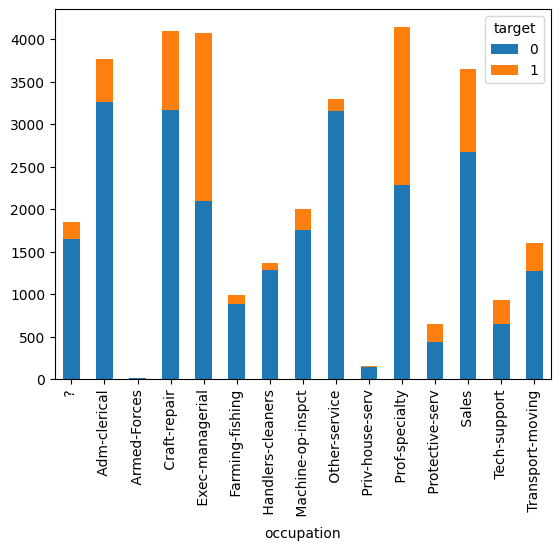

In [22]:
df.groupby(['occupation', 'target'])\
    .size().unstack().fillna(0).astype('int')\
        .plot.bar(stacked=True)

## Target Imbalance

In [23]:
df['target'].mean()

0.2408095574460244

## Outliers

<Axes: ylabel='Frequency'>

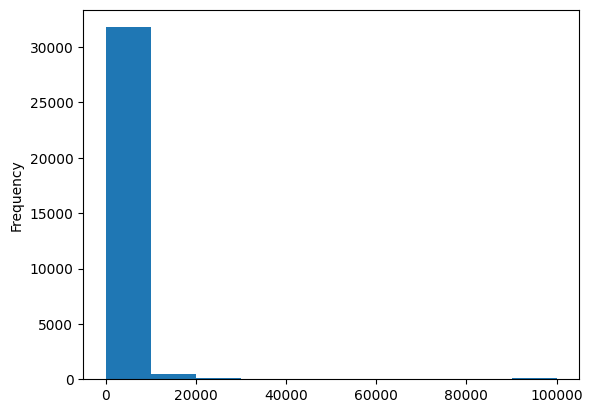

In [24]:
df['capital-gain'].plot.hist()

In [25]:
import numpy as np

In [29]:
cg = df['capital-gain']
z = np.abs(cg - cg.mean()) / cg.std()
df.where(z > 6).dropna()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,target
1246,54.0,Self-emp-inc,166459.0,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999.0,0.0,60.0,United-States,>50K,1.0
1368,52.0,Private,152234.0,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,99999.0,0.0,40.0,Japan,>50K,1.0
1482,53.0,Self-emp-inc,263925.0,HS-grad,9.0,Married-civ-spouse,Sales,Husband,White,Male,99999.0,0.0,40.0,United-States,>50K,1.0
1528,52.0,Private,118025.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999.0,0.0,50.0,United-States,>50K,1.0
1616,46.0,Private,370119.0,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999.0,0.0,60.0,United-States,>50K,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31828,47.0,Private,155664.0,Masters,14.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999.0,0.0,55.0,United-States,>50K,1.0
31972,43.0,Self-emp-inc,62026.0,Prof-school,15.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999.0,0.0,40.0,United-States,>50K,1.0
32090,66.0,Private,115498.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999.0,0.0,55.0,?,>50K,1.0
32238,47.0,Private,294913.0,Prof-school,15.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999.0,0.0,40.0,United-States,>50K,1.0


In [30]:
cg.describe()

count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

In [32]:
ad = np.abs(cg - cg.median())
mad = np.median(ad)
df.where(ad/mad > 6).dropna()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,target
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K,0.0
8,31.0,Private,45781.0,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K,1.0
9,42.0,Private,159449.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K,1.0
59,30.0,Private,188146.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,5013.0,0.0,40.0,United-States,<=50K,0.0
60,30.0,Private,59496.0,Bachelors,13.0,Married-civ-spouse,Sales,Husband,White,Male,2407.0,0.0,40.0,United-States,<=50K,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32515,66.0,Federal-gov,47358.0,10th,6.0,Married-civ-spouse,Craft-repair,Husband,White,Male,3471.0,0.0,40.0,United-States,<=50K,0.0
32518,57.0,Local-gov,110417.0,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,99999.0,0.0,40.0,United-States,>50K,1.0
32538,38.0,Private,139180.0,Bachelors,13.0,Divorced,Prof-specialty,Unmarried,Black,Female,15020.0,0.0,45.0,United-States,>50K,1.0
32548,65.0,Self-emp-not-inc,99359.0,Prof-school,15.0,Never-married,Prof-specialty,Not-in-family,White,Male,1086.0,0.0,60.0,United-States,<=50K,0.0


In [35]:
mad # warning, this actually marks everything != 0 as an outlier!

0.0

## Relations and Patterns

In [39]:
df[['target', 'education-num', 'age']].corr()

,target,education-num,age
target,1.000000,0.335154,0.234037
education-num,0.335154,1.000000,0.036527
age,0.234037,0.036527,1.000000


In [43]:
pd.get_dummies(df['education']).corrwith(df['target'])

 10th           -0.070038
 11th           -0.085864
 12th           -0.044690
 1st-4th        -0.034544
 5th-6th        -0.045826
 7th-8th        -0.059524
 9th            -0.055767
 Assoc-acdm      0.003250
 Assoc-voc       0.010048
 Bachelors       0.180485
 Doctorate       0.132572
 HS-grad        -0.131189
 Masters         0.174570
 Preschool      -0.022307
 Prof-school     0.154907
 Some-college   -0.063535
dtype: float64

<Axes: xlabel='education'>

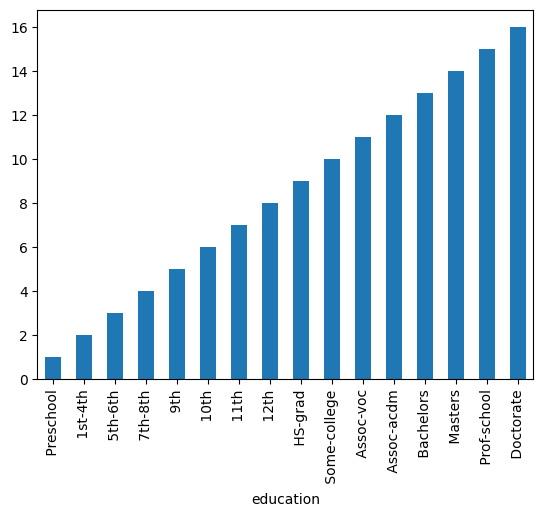

In [46]:
df.groupby('education')['education-num']\
    .mean().sort_values().plot.bar()

In [47]:
df.groupby('education')['education-num'].std()

education
 10th            0.0
 11th            0.0
 12th            0.0
 1st-4th         0.0
 5th-6th         0.0
 7th-8th         0.0
 9th             0.0
 Assoc-acdm      0.0
 Assoc-voc       0.0
 Bachelors       0.0
 Doctorate       0.0
 HS-grad         0.0
 Masters         0.0
 Preschool       0.0
 Prof-school     0.0
 Some-college    0.0
Name: education-num, dtype: float64

## Missing Data


### 1. Missing Completely at Random (MCAR)
- **Definition**: The probability of being missing is the same for all observations.
- **Identification**:
  - No systematic relationship between missingness and any values, observed or unobserved.
  - Statistical tests (e.g., Little's MCAR test) can help determine MCAR.


### 2. Missing at Random (MAR)
- **Definition**: The probability of being missing is related to observed data, but not the missing data.
- **Identification**:
  - Patterns or relationships between the missingness and other observed variables.
  - Requires domain knowledge and statistical analysis to identify.


### 3. Missing Not at Random (MNAR)
- **Definition**: The probability of being missing is related to the missing data itself.
- **Identification**:
  - Missingness is related to unobserved predictors or the value of the missing data.
  - Difficult to confirm; requires strong assumptions and domain expertise.


### Diagnosing Missing Data in a Dataset
- **Visualization**: Heatmaps, missing data patterns.
- **Summary Statistics**: Count missing values, calculate percentages.
- **Diagnostics**: Use tests and diagnostics to understand the mechanism (MCAR, MAR, MNAR).



# An example business case - Advertising

- A company makes X USD profit per conversion, with a conversion rate of 0.1 for those in a 'high income' class, 0.05 else.
- We have a budget to target 10k people
- How would the total number of conversions change if we could could identify the 'Exec-managerial' group?

In [48]:
df['target'].mean() # always guessing 'no' gets it right 75% of the time ...

0.2408095574460244

## Base Case

In [49]:
conversion_rate_high = 0.1
conversion_rate_low = 0.05
N = 10_000
high_income_rate = df['target'].mean()

total_coversions = N * \
    (conversion_rate_high * high_income_rate + 
     conversion_rate_low * (1 - high_income_rate))
total_coversions

620.4047787230123

## Execl-managerial only

In [52]:
df.where(df['occupation'] == ' Exec-managerial')\
    .dropna()['target'].mean()

0.4840137727496311

In [68]:
high_income_rate = df.where(df['occupation'] == ' Exec-managerial')\
    .dropna()['target'].mean()
high_income_rate

0.4840137727496311

In [54]:
total_coversions = N * \
    (conversion_rate_high * high_income_rate + 
     conversion_rate_low * (1 - high_income_rate))
total_coversions

742.0068863748155

## Can we do better, by predicting the class with a multivariate model?

In [59]:
cat_features = ['sex', 'education', 'occupation']
cont_features = ['age', 'hours-per-week']

X = df[cont_features].join(
    pd.get_dummies(df[cat_features], drop_first=True)
)
y = df['target']

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [61]:
Xtr, Xte, ytr, yte = train_test_split(X, y)

In [63]:
model = DecisionTreeClassifier(max_depth=10).fit(Xtr, ytr)

In [64]:
cm = confusion_matrix(yte, model.predict(Xte))

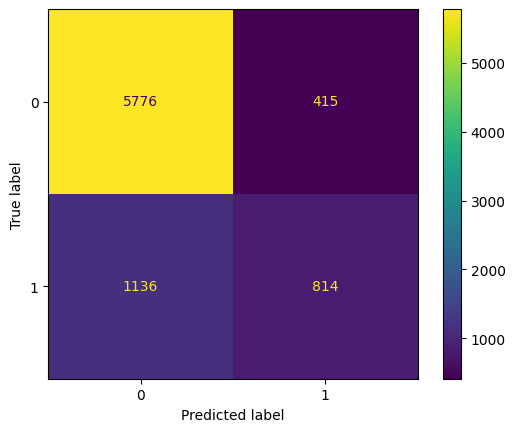

In [66]:
ConfusionMatrixDisplay(cm).plot()

# Updated business case:

In [69]:
cm[1,0]

1136

In [70]:
N * (conversion_rate_high * cm[1,1]/cm[:,1].sum() + conversion_rate_low * cm[0,1]/cm[:,1].sum())

831.1635475996745

### Q: Why is this performing better than our one-occupation case?

## Even better business case:

- What if you start to factor in cost of advertising?
- How does your business case depend on the conversion rate, for both groups?
- Advanced: Can you segment users who have a particularly high conversion rate?

## If Time: A cautionary exampled

In [71]:
N = 1_000
k = 5_000
y = np.random.choice(2, N)
X = np.random.normal(0, 1, (N, k))

In [72]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [73]:
from sklearn.feature_selection import SelectKBest, f_classif

### Shooting yourself in the foot

In [93]:
Xp = SelectKBest(f_classif, k=1_000).fit_transform(X, y)

In [95]:
Xtr, Xte, ytr, yte = train_test_split(Xp, y)

In [96]:
accuracy_score(yte, LogisticRegression().fit(Xtr, ytr).predict(Xte)) # suspiciously high!

0.82

## The Right Way - train/test split first, *then* feature selection!

We'll explore pipelines in the next session that will automate some of this

In [99]:
Xtr, Xte, ytr, yte = train_test_split(X, y)

In [100]:
sel = SelectKBest(f_classif, k=1_000).fit(Xtr, ytr)

In [101]:
accuracy_score(yte, LogisticRegression().fit(sel.transform(Xtr), ytr).predict(sel.transform(Xte)))

0.476